In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drugdata=pd.read_csv(mouse_drug_data_to_load)
clinicaldata=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset, the combines table name is "master"
master=pd.merge(drugdata,clinicaldata, on="Mouse ID",how="outer")

# Display the data table for preview
master.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
master.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meantumor=master[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).mean().reset_index(drop=False)
# Convert to DataFrame
# Preview DataFrame
meantumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderrtumor=master[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).sem().reset_index(drop=False)
# Convert to DataFrame
# Preview DataFrame
stderrtumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
## Minor Data Munging to Re-Format the Data Frames
#just to crosstab the drug, timepoint and tumor volumne 
pivott=pd.pivot_table(master[['Drug', 'Timepoint', 'Tumor Volume (mm3)']],values="Tumor Volume (mm3)",index='Drug',columns="Timepoint")
#pivot the drug, timepoint and tumor volumne using mean aggregation 
pivotmean=pd.pivot_table(master[['Drug', 'Timepoint', 'Tumor Volume (mm3)']],values="Tumor Volume (mm3)",index='Drug',columns="Timepoint",aggfunc='mean')
pivotmean


Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,45.0,44.266086,43.084291,42.064317,40.716325,39.939528,38.769339,37.816839,36.958001,36.236114
Ceftamin,45.0,46.503051,48.285125,50.094055,52.157049,54.287674,56.769517,58.827548,61.467895,64.132421
Infubinol,45.0,47.062001,49.403909,51.296397,53.197691,55.715252,58.299397,60.742461,63.162824,65.755562
Ketapril,45.0,47.389175,49.582269,52.399974,54.920935,57.678982,60.994507,63.371686,66.068580,70.662958
Naftisol,45.0,46.796098,48.694210,50.933018,53.644087,56.731968,59.559509,62.685087,65.600754,69.265506
Placebo,45.0,47.125589,49.423329,51.359742,54.364417,57.482574,59.809063,62.420615,65.052675,68.084082
Propriva,45.0,47.248967,49.101541,51.067318,53.346737,55.504138,58.196374,60.350199,63.045537,66.258529
Ramicane,45.0,43.944859,42.531957,41.495061,40.238325,38.974300,38.703137,37.451996,36.574081,34.955595
Stelasyn,45.0,47.527452,49.463844,51.529409,54.067395,56.166123,59.826738,62.440699,65.356386,68.438310


In [6]:
#pivot the drug, timepoint and tumor volumne using standard error aggregation
pivotstderror=pd.pivot_table(master[['Drug', 'Timepoint', 'Tumor Volume (mm3)']],values="Tumor Volume (mm3)",index='Drug',columns="Timepoint",aggfunc='sem')
pivotstderror

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,0.0,0.448593,0.702684,0.838617,0.909731,0.881642,0.934460,1.052241,1.223608,1.223977
Ceftamin,0.0,0.164505,0.236144,0.332053,0.359482,0.439356,0.490620,0.692248,0.708505,0.902358
Infubinol,0.0,0.235102,0.282346,0.357705,0.476210,0.550315,0.631061,0.984155,1.055220,1.144427
Ketapril,0.0,0.264819,0.357421,0.580268,0.726484,0.755413,0.934121,1.127867,1.158449,1.453186
Naftisol,0.0,0.202385,0.319415,0.444378,0.595260,0.813706,0.975496,1.013769,1.118567,1.416363
Placebo,0.0,0.218091,0.402064,0.614461,0.839609,1.034872,1.218231,1.287481,1.370634,1.351726
Propriva,0.0,0.231708,0.376195,0.466109,0.555181,0.577401,0.746045,1.084929,1.564779,1.888586
Ramicane,0.0,0.482955,0.720225,0.770432,0.786199,0.746991,0.864906,0.967433,1.128445,1.226805
Stelasyn,0.0,0.239862,0.433678,0.493261,0.621889,0.741922,0.899548,1.003186,1.410435,1.576556


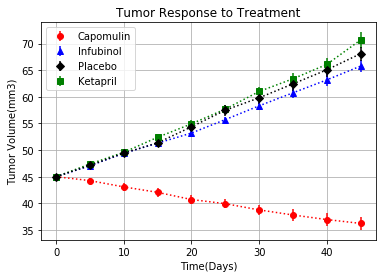

In [7]:
# Generate the Plot (with Error Bars)
#create the sub plot 
fig, ax = plt.subplots()
#get the x-axis
timepoint=pivotmean.keys()
#plot the line chart same as what the answer has for each drug
capomulin = plt.plot(timepoint, pivott.loc['Capomulin',:], 
                        color="red",label='Capomulin',linestyle=":")
infubinol = plt.plot(timepoint, pivott.loc['Infubinol',:], 
                        color="blue",label='Infubinol',linestyle=":")
ketapril = plt.plot(timepoint, pivott.loc['Ketapril',:], 
                        color="green",label='Ketapril',linestyle=":")
placebo = plt.plot(timepoint, pivott.loc['Placebo',:], 
                        color="black",label='Placebo',linestyle=":")
#plot the error bar  as what the answer has for each drug
capomulin = plt.errorbar(timepoint, pivotmean.loc['Capomulin',:],pivotstderror.loc['Capomulin',:],fmt='o', 
                        color="red",label='Capomulin')
infubinol = plt.errorbar(timepoint, pivotmean.loc['Infubinol',:], pivotstderror.loc['Infubinol',:],fmt='^', 
                        color="blue",label='Infubinol')
ketapril = plt.errorbar(timepoint, pivotmean.loc['Ketapril',:], pivotstderror.loc['Ketapril',:],fmt='s', 
                        color="green",label='Ketapril')
placebo = plt.errorbar(timepoint, pivotmean.loc['Placebo',:], pivotstderror.loc['Placebo',:],fmt='D', 
                        color="black",label='Placebo')
#format the figure
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume(mm3)")
ax.set_title("Tumor Response to Treatment")
ax=plt.grid()
#create the legend and combine the two types into one legend
plt.legend(handles=[capomulin,infubinol,placebo,ketapril],loc="upper left")
plt.show()
# Save the Figure
fig.savefig('Tumor Response to Treatment')

In [8]:
# this is my practice making a dictionary stores all the shapes I can use later in the loop error bar loop
design=["1","2","3","4","8","s","o","p","*","^"]
color=[]
drugs=[n for n in pivotstderror.index]
marker={}
for j in range(0,10):
     marker[drugs[j]]=design[j]
marker

{'Capomulin': '1',
 'Ceftamin': '2',
 'Infubinol': '3',
 'Ketapril': '4',
 'Naftisol': '8',
 'Placebo': 's',
 'Propriva': 'o',
 'Ramicane': 'p',
 'Stelasyn': '*',
 'Zoniferol': '^'}

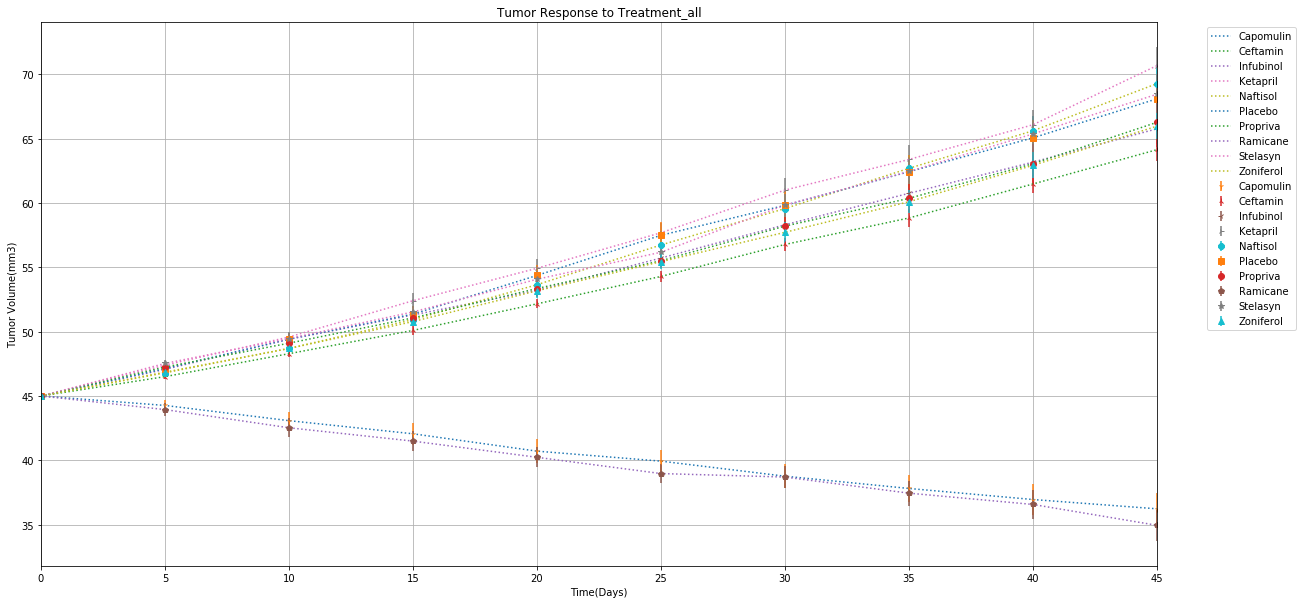

In [9]:
# and this is my practice using a loop to produce all the lines, but the chart looks messy, as there are so many overlaps
fig, ax = plt.subplots(figsize=(20, 10))
for n in pivotmean.index:
    a= marker[n]
    lines = plt.plot(timepoint, pivott.loc[n,:],linestyle=":")
    errorbars=plt.errorbar(timepoint, pivotmean.loc[n,:], pivotstderror.loc[n,:],fmt=a)
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
ax.set_xlim(0, len(timepoint) + 35)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume(mm3)")
ax.set_title("Tumor Response to Treatment_all")
ax=plt.grid()


In [10]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [11]:
#just crosstab the 'Drug', 'Timepoint', 'Metastatic Sites' columns
met=pd.pivot_table(master[['Drug', 'Timepoint', 'Metastatic Sites']],values='Metastatic Sites',index='Drug',columns="Timepoint")

In [12]:
#create a pivot table, aggregation using mean
metmean=pd.pivot_table(master[['Drug', 'Timepoint', 'Metastatic Sites']],values='Metastatic Sites',index='Drug',columns="Timepoint",aggfunc='mean')
metmean

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,0.0,0.160000,0.320000,0.375000,0.652174,0.818182,1.090909,1.181818,1.380952,1.476190
Ceftamin,0.0,0.380952,0.600000,0.789474,1.111111,1.500000,1.937500,2.071429,2.357143,2.692308
Infubinol,0.0,0.280000,0.666667,0.904762,1.050000,1.277778,1.588235,1.666667,2.100000,2.111111
Ketapril,0.0,0.304348,0.590909,0.842105,1.210526,1.631579,2.055556,2.294118,2.733333,3.363636
Naftisol,0.0,0.260870,0.523810,0.857143,1.150000,1.500000,2.066667,2.266667,2.466667,2.538462
Placebo,0.0,0.375000,0.833333,1.250000,1.526316,1.941176,2.266667,2.642857,3.166667,3.272727
Propriva,0.0,0.320000,0.565217,0.764706,1.000000,1.357143,1.615385,2.300000,2.777778,2.571429
Ramicane,0.0,0.120000,0.250000,0.333333,0.347826,0.652174,0.782609,0.952381,1.100000,1.250000
Stelasyn,0.0,0.240000,0.478261,0.782609,0.952381,1.157895,1.388889,1.562500,1.583333,1.727273


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
#create a pivot table, aggregation using standard error


In [14]:
metstderror=pd.pivot_table(master[['Drug', 'Timepoint', 'Metastatic Sites']],values='Metastatic Sites',index='Drug',columns="Timepoint",aggfunc='sem')
metstderror

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,0.0,0.074833,0.125433,0.132048,0.161621,0.181818,0.172944,0.169496,0.175610,0.202591
Ceftamin,0.0,0.108588,0.152177,0.180625,0.241034,0.258831,0.249479,0.266526,0.289128,0.286101
Infubinol,0.0,0.091652,0.159364,0.194015,0.234801,0.265753,0.227823,0.224733,0.314466,0.309320
Ketapril,0.0,0.098100,0.142018,0.191381,0.236680,0.288275,0.347467,0.361418,0.315725,0.278722
Naftisol,0.0,0.093618,0.163577,0.158651,0.181731,0.185240,0.266667,0.330464,0.321702,0.351104
Placebo,0.0,0.100947,0.115261,0.190221,0.234064,0.263888,0.300264,0.341412,0.297294,0.304240
Propriva,0.0,0.095219,0.105690,0.136377,0.171499,0.199095,0.266469,0.366667,0.433903,0.428571
Ramicane,0.0,0.066332,0.090289,0.115261,0.119430,0.119430,0.139968,0.145997,0.160591,0.190221
Stelasyn,0.0,0.087178,0.123672,0.153439,0.200905,0.219824,0.230641,0.240983,0.312815,0.359062


In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


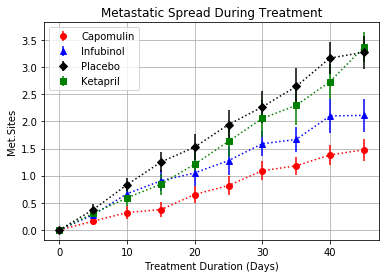

In [16]:
#produce what the answer has:
#get the x-axis
fig, ax = plt.subplots()
timepoint=pivotmean.keys()
#plot the line chart same as what the answer has:
capomulin = plt.plot(timepoint, met.loc['Capomulin',:], 
                        color="red",label='Capomulin',linestyle=":")
infubinol = plt.plot(timepoint, met.loc['Infubinol',:], 
                        color="blue",label='Infubinol',linestyle=":")
ketapril = plt.plot(timepoint, met.loc['Ketapril',:], 
                        color="green",label='Ketapril',linestyle=":")
placebo = plt.plot(timepoint, met.loc['Placebo',:], 
                        color="black",label='Placebo',linestyle=":")
#plot the error bar as what answer looks like
capomulin = plt.errorbar(timepoint, metmean.loc['Capomulin',:],metstderror.loc['Capomulin',:],fmt='o', 
                        color="red",label='Capomulin')
infubinol = plt.errorbar(timepoint, metmean.loc['Infubinol',:], metstderror.loc['Infubinol',:],fmt='^', 
                        color="blue",label='Infubinol')
ketapril = plt.errorbar(timepoint, metmean.loc['Ketapril',:], metstderror.loc['Ketapril',:],fmt='s', 
                        color="green",label='Ketapril')
placebo = plt.errorbar(timepoint, metmean.loc['Placebo',:], metstderror.loc['Placebo',:],fmt='D', 
                        color="black",label='Placebo')
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met.Sites")
ax.set_title("Metastatic Spread During Treatment")
ax=plt.grid()
# Save the Figure
plt.legend(handles=[capomulin,infubinol,placebo,ketapril],loc="upper left")
plt.show()
fig.savefig('Metastatic Spread During Treatment')

In [17]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


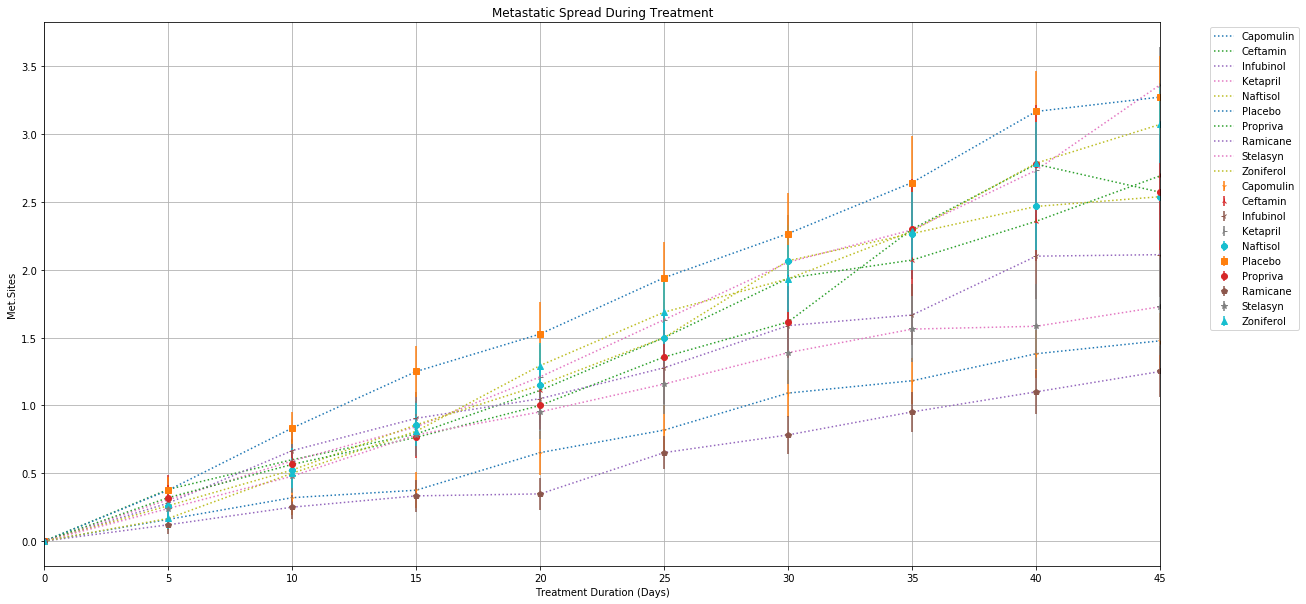

In [18]:
#this is my practice of using loop
fig, ax = plt.subplots(figsize=(20, 10))
for n in met.index:
    a= marker[n]
    lines = plt.plot(timepoint, met.loc[n,:],linestyle=":")
    errorbars=plt.errorbar(timepoint, metmean.loc[n,:], metstderror.loc[n,:],fmt=a)
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
ax.set_xlim(0, len(timepoint) + 35)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met.Sites")
ax.set_title("Metastatic Spread During Treatment")
ax=plt.grid()
fig.savefig('Metastatic Spread During Treatment_all')

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [20]:
#pivot table using aggragation as count
survivalmice=pd.pivot_table(master[['Drug', 'Timepoint', 'Mouse ID']],values='Mouse ID',index='Drug',columns="Timepoint",aggfunc='count')
survivalmice

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,25,25,25,24,23,22,22,22,21,21
Ceftamin,25,21,20,19,18,18,16,14,14,13
Infubinol,25,25,21,21,20,18,17,12,10,9
Ketapril,25,23,22,19,19,19,18,17,15,11
Naftisol,25,23,21,21,20,18,15,15,15,13
Placebo,25,24,24,20,19,17,15,14,12,11
Propriva,26,25,23,17,17,14,13,10,9,7
Ramicane,25,25,24,24,23,23,23,21,20,20
Stelasyn,26,25,23,23,21,19,18,16,12,11


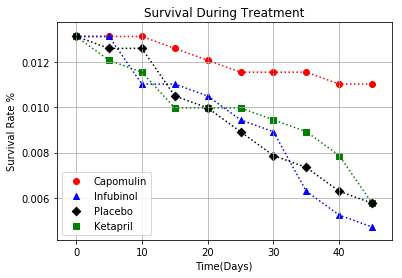

In [21]:
#get the total number of mouse to calculate the percentage
total=master['Mouse ID'].count()
#Produce what the answer has
fig, ax = plt.subplots()
#plot the line chart same as what the answer has:
capomulin = plt.plot(timepoint, survivalmice.loc['Capomulin',:]/total, 
                        color="red",label='Capomulin',linestyle=":")
infubinol = plt.plot(timepoint, survivalmice.loc['Infubinol',:]/total, 
                        color="blue",label='Infubinol',linestyle=":")
ketapril = plt.plot(timepoint, survivalmice.loc['Ketapril',:]/total, 
                        color="green",label='Ketapril',linestyle=":")
placebo = plt.plot(timepoint, survivalmice.loc['Placebo',:]/total, 
                        color="black",label='Placebo',linestyle=":")
#plot the scatter
capomulin = plt.scatter(timepoint, survivalmice.loc['Capomulin',:]/total,marker='o', 
                        color="red",label='Capomulin')
infubinol = plt.scatter(timepoint, survivalmice.loc['Infubinol',:]/total,marker='^', 
                        color="blue",label='Infubinol')
ketapril = plt.scatter(timepoint, survivalmice.loc['Ketapril',:]/total,marker='s', 
                        color="green",label='Ketapril')
placebo = plt.scatter(timepoint, survivalmice.loc['Placebo',:]/total,marker='D', 
                        color="black",label='Placebo')
#format the figure
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Survival Rate %")
ax.set_title("Survival During Treatment")
ax=plt.grid()
plt.legend(handles=[capomulin,infubinol,placebo,ketapril],loc="lower left")
plt.show()
# Save the Figure
fig.savefig("Survival During Treatment")

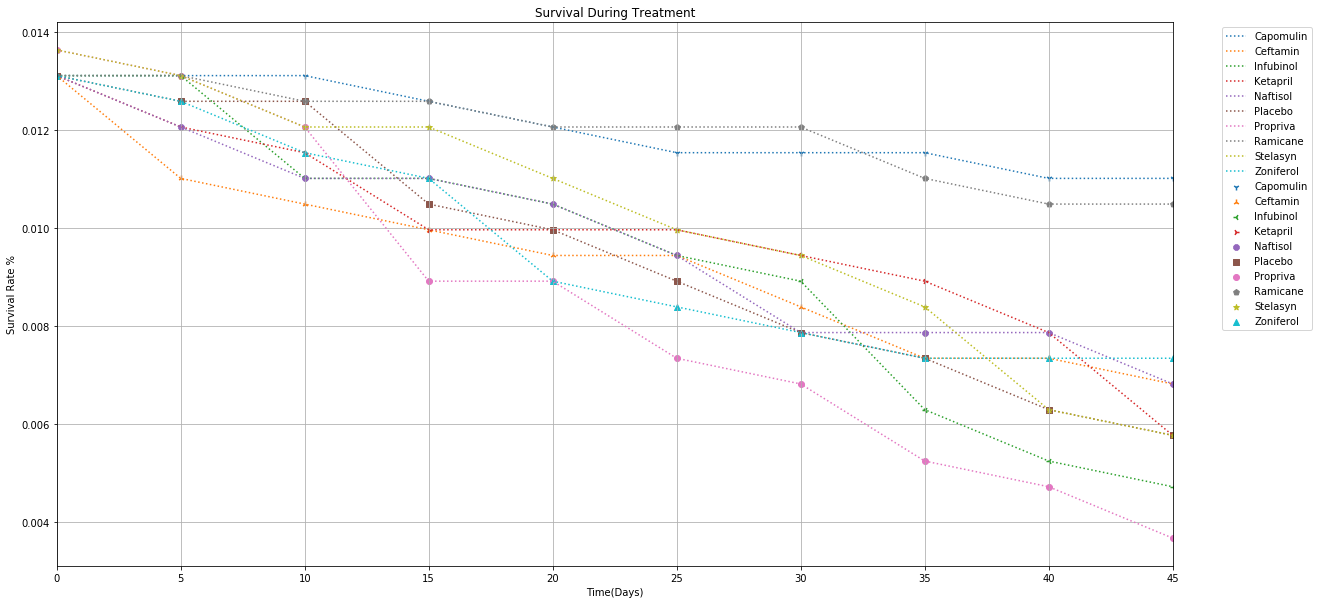

In [22]:
#using loop to produce for each drug
fig, ax = plt.subplots(figsize=(20, 10))
for n in survivalmice.index:
    a= marker[n]
    lines = plt.plot(timepoint, survivalmice.loc[n,:]/total,linestyle=':')
    scatter=plt.scatter(timepoint, survivalmice.loc[n,:]/total,marker=a)
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
ax.set_xlim(0, len(timepoint) + 35)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Survival Rate %")
ax.set_title("Survival During Treatment")
ax=plt.grid()
plt.show()
fig.savefig('Survival During Treatment_all')


## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
# Display the data to confirm


In [24]:
#take a subset of the master table
subtable=master[[ 'Timepoint','Drug', 'Tumor Volume (mm3)']]
#take the mean with timepoint 0 for each drug
subtablezero=subtable.loc[(subtable['Timepoint']== 0),:].groupby(['Drug','Timepoint']).mean().reset_index(drop=False)  
#take the mean with timepoint 45 for each drug
subtable45=subtable.loc[(subtable['Timepoint']== 45),:].groupby(['Drug','Timepoint']).mean().reset_index(drop=False)
#combine the two table and calculate the change column
readytable=pd.merge(subtablezero,subtable45,on="Drug",how="inner")
readytable['% Changes']=(readytable['Tumor Volume (mm3)_y']-readytable['Tumor Volume (mm3)_x'])/readytable['Tumor Volume (mm3)_x']*100
#just take drug and %changes from the merged table,set drug name as index
plottable=readytable[["Drug",'% Changes']].set_index("Drug")
#create the pass and fail column based on positive and negative
plottable['Pass']=plottable['% Changes']<0
plottable

,% Changes,Pass
Drug,,
Capomulin,-19.475303,True
Ceftamin,42.516492,False
Infubinol,46.123472,False
Ketapril,57.028795,False
Naftisol,53.923347,False
Placebo,51.297960,False
Propriva,47.241175,False
Ramicane,-22.320900,True
Stelasyn,52.085134,False


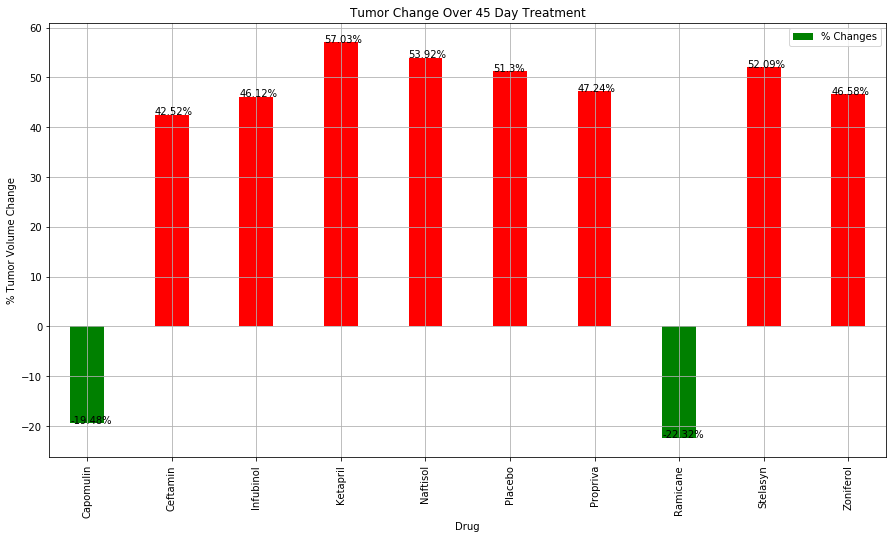

In [25]:
#plot the bar chart using pandas
ax=plottable.plot(kind='bar', color=[plottable['Pass'].map({True: 'green', False: 'red'})],figsize=(15,8),width=0.4)
plt.grid()
#lable the percentage
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 2))+"%", fontsize=10, color='black')
#format the chart
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
plt.show()
fig.savefig('Tumor Change Over 45 Day Treatment')